In [3]:
import re
import os
import copy
import statistics
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from pymongo import MongoClient
from collections import defaultdict
from matplotlib.patches import Patch
import matplotlib.ticker as ticker

# plt.style.use('seaborn')
plt.style.use('./prettyplots.mplstyle')

db = MongoClient().AuNP_new
collection_Image = db["Image_Meta"]
collection_Metadata = db["Paper_Metadata"]
collection_HTML = db["Paper_Raw_HTML"]
collection_Subfigures = db["Subfigures"]
collection_Combined = db["Combined"]
collection_Subfigures_final = db["Subfigures_final"]
collection_Image_final = db["Image_Meta_final"]

OUTPUT_DIR = 'analysis_results_hil'
def make_path(path):
    return os.path.join(OUTPUT_DIR, path)

total_rods = collection_Subfigures_final.count_documents({'Main_class': 'rod'})
total_spheres = collection_Subfigures_final.count_documents({'Main_class': 'sphere'})
total_cubes = collection_Subfigures_final.count_documents({'Main_class': 'cube'})
total_triangles = collection_Subfigures_final.count_documents({'Main_class': 'triangle'})

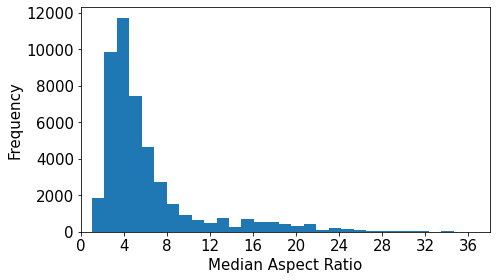

In [47]:

aspects = []
for doc in collection_Subfigures_final.find({'Main_class': 'rod', 'Size': {'$exists': True}}):
    if len(doc['Size']['Measurement']['rod']['length']) == 0:
        continue
    aspect_ratios = [doc['Size']['Measurement']['rod']['length'][i] / float(doc['Size']['Measurement']['rod']['width'][i]) for i in range(len(doc['Size']['Measurement']['rod']['length']))]
    median_aspect_ratio = statistics.median(aspect_ratios)
    aspects.append(median_aspect_ratio)
    # for aspect_ratio in aspect_ratios:
    #     aspects.append(aspect_ratio)

    for aspect_ratio in aspect_ratios:
        aspects.append(aspect_ratio)
fig, ax = plt.subplots()
ax.set_xlim(0, 38)
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
n, bins, patches = ax.hist(aspects, 100)
ax.set_xlabel('Median Aspect Ratio')
ax.set_ylabel('Frequency')
# ax.set_title('Histogram of Aspect Ratios of Rods')
ax.xaxis.set_major_locator(ticker.MultipleLocator(4))
fig.tight_layout()
plt.show()
fig.savefig('rod_aspect_hist.pdf')

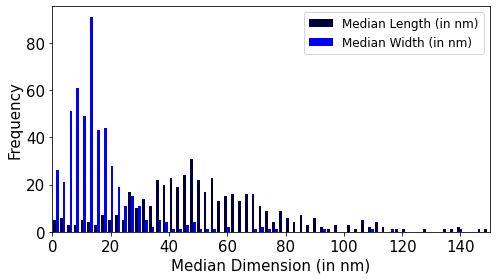

In [30]:
fig, ax = plt.subplots()
ax.set_xlim(0, 150)
ax.xaxis.set_major_locator(ticker.MultipleLocator(20))
n, bins, patches = ax.hist([lengths, widths], 30000, color=[(0, 0, 0.25), (0, 0, 1)], label=['Median Length (in nm)', 'Median Width (in nm)'])
ax.set_xlabel('Median Dimension (in nm)')
ax.set_ylabel('Frequency')
ax.legend()
# ax.set_yscale('log')
# ax.set_title('Histogram of Widths of Rods')
fig.tight_layout()
plt.show()
fig.savefig('rod_length_width_dist.pdf')

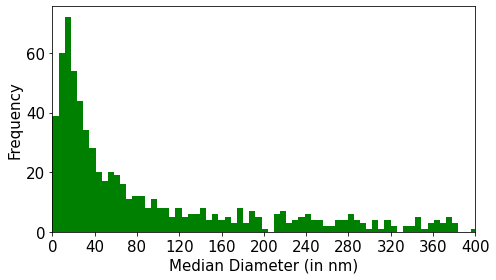

In [31]:

aspects = []
for doc in collection_Subfigures_final.find({'Main_class': 'sphere', 'Size': {'$exists': True}}):
    # print(doc['Size']['Measurement'])
    if len(doc['Size']['Measurement']['sphere']['diameter']) == 0:
        continue
    if doc['Size']['Unit'] == 'pixels':
        continue
    if doc['Size']['Unit'] == 'nm':
        conversion_factor = 1
    else:
        conversion_factor = 1000

    sizes = [doc['Size']['Measurement']['sphere']['diameter'][i] * conversion_factor for i in range(len(doc['Size']['Measurement']['sphere']['diameter']))]
    median_size = statistics.median(sizes)

    aspects.append(median_size)

fig, ax = plt.subplots()
ax.set_xlim(0, 400)
ax.xaxis.set_major_locator(ticker.MultipleLocator(40))
n, bins, patches = ax.hist(aspects, 100000, color='g')
ax.set_xlabel('Median Diameter (in nm)')
ax.set_ylabel('Frequency')
# ax.set_title('Histogram of Diameters of Spheres')
fig.tight_layout()
plt.show()
fig.savefig('sphere_dia_dist.pdf')


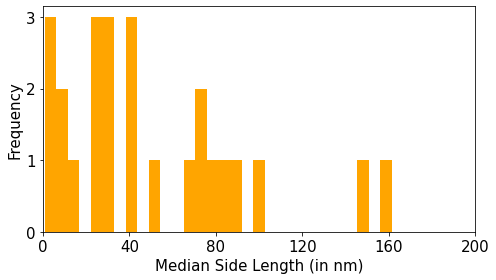

In [36]:
aspects = []
for doc in collection_Subfigures_final.find({'Main_class': 'cube', 'Size': {'$exists': True}}):
    if len(doc['Size']['Measurement']['sphere']['diameter']) == 0:
        continue
    if doc['Size']['Unit'] == 'pixels':
        continue
    if doc['Size']['Unit'] == 'nm':
        conversion_factor = 1
    else:
        conversion_factor = 1000

    sizes = [doc['Size']['Measurement']['cube']['side'][i] * conversion_factor for i in range(len(doc['Size']['Measurement']['cube']['side']))]
    median_size = statistics.median(sizes)

    aspects.append(median_size)

fig, ax = plt.subplots()
ax.xaxis.set_major_locator(ticker.MultipleLocator(40))
ax.set_xlim(0, 200)
ax.set_yticks(list(range(4)))
n, bins, patches = ax.hist(aspects, 500, color='orange')
ax.set_xlabel('Median Side Length (in nm)')
ax.set_ylabel('Frequency')
# ax.set_title('Histogram of Side Lengths of Cubes')
fig.tight_layout()
plt.show()
fig.savefig('cube_side_dist.pdf')


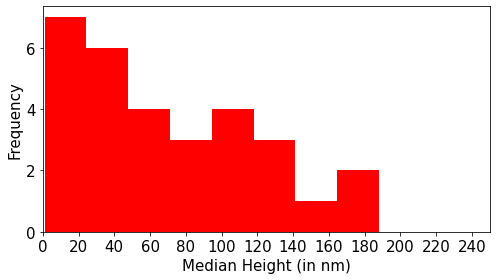

In [34]:
aspects = []
for doc in collection_Subfigures_final.find({'Main_class': 'triangle', 'Size': {'$exists': True}}):
    if len(doc['Size']['Measurement']['triangle']['height']) == 0:
        continue
    if doc['Size']['Unit'] == 'pixels':
        continue
    if doc['Size']['Unit'] == 'nm':
        conversion_factor = 1
    else:
        conversion_factor = 1000

    sizes = [doc['Size']['Measurement']['triangle']['height'][i] * conversion_factor for i in range(len(doc['Size']['Measurement']['triangle']['height']))]
    median_size = statistics.median(sizes)

    aspects.append(median_size)

fig, ax = plt.subplots()
ax.xaxis.set_major_locator(ticker.MultipleLocator(20))
ax.set_xlim(0, 250)
n, bins, patches = ax.hist(aspects, 6000, color='r')
ax.set_xlabel('Median Height (in nm)')
ax.set_ylabel('Frequency')
# ax.set_title('Histogram of Heights of Triangular Prisms')
fig.tight_layout()
plt.show()
fig.savefig('triangle_height_dist.pdf')

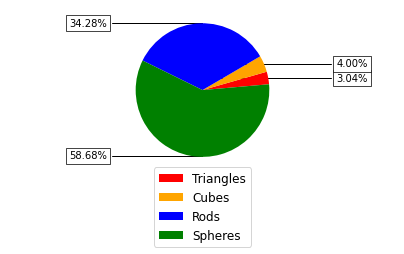

In [5]:
fig, ax= plt.subplots(figsize=(7,4))
plt.subplots_adjust(bottom=0.3)
total = [total_triangles, total_cubes, total_rods, total_spheres]
# plt.title('Distribution over particle shapes')
plt.gca().axis("equal")
patches, texts = pie = plt.pie(total, startangle=5, colors=['r', 'orange', 'b', 'g'])
labels = ["Triangles", 
          "Cubes",
          "Rods",
          "Spheres"]

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
arrowprops=dict(arrowstyle="-",connectionstyle="angle,angleA=0,angleB=90")
kw = dict(xycoords='data',textcoords='data',arrowprops=arrowprops, 
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(patches):
    ang = (p.theta2 - p.theta1)/2.+p.theta1
    y = np.sin(ang/180.*np.pi)
    x = 2.0*np.sign(np.cos(ang/180.*np.pi))
    plt.gca().annotate("{:.2f}%".format(total[i] * 100/sum(total)), xy=(0, 0), xytext=( x, y), **kw )

plt.legend(pie[0],labels, loc="center", bbox_to_anchor=(0.5,-0.2))
# plt.show()
fig.savefig('morphology_pie_chart.pdf')

325 36
0.9659863945578231


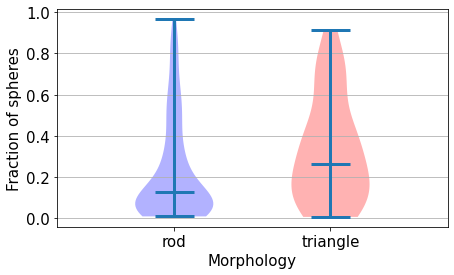

In [2]:
def set_axis_style(ax, labels):
    ax.xaxis.set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1))
    ax.set_xticklabels(labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_xlabel('Morphology')

factory = {
    'rod': [],
    'cube': [],
    'triangle': []
}

for doc in collection_Subfigures_final.find({'Main_class': {'$exists': True}}):
    if len(doc['Minority_classes']) != 1:
        continue
    if doc["Main_class"] != "sphere" and "sphere" not in doc["Minority_classes"]:
        continue
    
    # if 'sphere' in doc['Minority_classes']:
    #     second_class = doc['Main_class']
    # else:
    #     continue
    if doc["Main_class"] == "sphere":
        second_class = doc["Minority_classes"][0]
    else:
        second_class = doc["Main_class"]
    if second_class == "cube":
        continue

    num_spheres = len(doc['Size']['Measurement']['sphere']['diameter'])
    if second_class == 'rod':
        dimension = "length"
    # elif second_class == 'cube':
    #     dimension = "side"
    elif second_class == 'triangle':
        dimension = "height"

    num_second = len(doc['Size']['Measurement'][second_class][dimension])
    if num_second < 5:
        continue
    impurity_fraction = float(num_spheres) / float(num_spheres + num_second)
    if impurity_fraction == 1:
        print('-----------------------')
        print(num_spheres)
        print(num_second)
        print(doc['Main_class'],doc['Minority_classes'])
        print(doc['Size'])
        print(doc['Hash'])
    factory[second_class].append(impurity_fraction)

fig, axes = plt.subplots()
violinplots = axes.violinplot(dataset = [factory['rod'],
                        #    factory['cube'],
                           factory['triangle']],
                        #    showmeans=True,
                           showmedians=True,
                           showextrema=True,
                           )

print(len(factory['rod']), len(factory['triangle']))

violinplots['bodies'][0].set_facecolor('b')
violinplots['bodies'][1].set_facecolor('r')

# axes.set_title('Day Ahead Market')
axes.yaxis.grid(True)
axes.set_xlabel('Morphology')
axes.set_ylabel('Fraction of spheres')

# set style for the axes
# labels = ['rod', 'cube', 'triangle']
labels = ['rod', 'triangle']
set_axis_style(axes, labels)

print(max(factory['rod']))

plt.show()
fig.savefig('violin.pdf')